# Simple Linear Regression
##### Dataset have a linear relationship b/w one independent feature and one out feature

## Our Aim
#### We want to build such a model that takes weight is input and predict height is an output feature

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib  inline


In [2]:
df  = pd.read_csv("height-weight.csv")

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

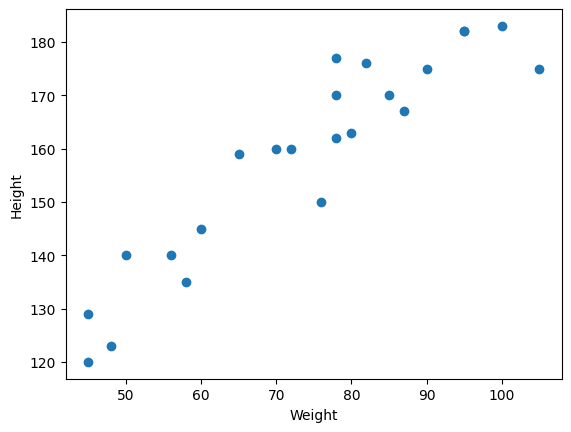

In [4]:
# see the relationship

plt.scatter(df['Weight'] , df['Height'])
plt.xlabel('Weight')
plt.ylabel("Height")

In [5]:
# lets some EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 500.0 bytes


In [6]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


In [9]:
df.isna().sum()

Weight    0
Height    0
dtype: int64

### 3)  Divide our dataset into dependent and independent features

In [7]:
X = df[['Weight']]  # it should be 2-d array . b/c it is independent feature and model training required 2d

y = df['Height']  # Depended Feature 1-d series b/c it is output

In [11]:
X.shape   # input feature

(23, 1)

In [12]:
y.shape  # output feature

(23,)

### 4) Further divide the dataset into train and test dataset

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train , X_test, y_train , y_test =train_test_split(X,y , test_size = 0.20 , random_state=42)  # make 20 % data for test

In [10]:
X_train.shape   # input feature for train

(18, 1)

In [17]:
X_test.shape  # input feature for test

(5, 1)

In [19]:
y_train.shape  # output feature for train

(18,)

In [20]:
y_test.shape  # output feature for test

(5,)

## 5) Standardization
####  StandardScaling --> we Apply StandardScaling on train and test data b/c to make scale down unit value of each feature  and the cost fun(Error) is become smaller on the scale data so that the convergence algorithm is optamize and quickly reach to Global Maxima.

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [14]:
X_train = scaler.fit_transform( X_train)  # we always fit_transform the Train dataset 
X_train


array([[ 1.73689094],
       [-0.92026952],
       [ 1.4542143 ],
       [ 0.21043706],
       [-1.48562281],
       [ 1.17153765],
       [-1.6552288 ],
       [-0.80719886],
       [-0.24184557],
       [ 0.0973664 ],
       [-1.37255215],
       [-1.03334018],
       [-0.12877492],
       [ 0.88886101],
       [ 0.43657837],
       [ 0.60618436],
       [ 0.71925502],
       [ 0.32350772]])

In [16]:
X_test = scaler.transform(X_test)  # We always apply transform on the Test dataset

C:\Users\Tariq Ullah\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [19]:
X_test

array([[-4.18742148],
       [-4.18742148],
       [-4.29289751],
       [-4.13308534],
       [-4.22897264]])

Text(0, 0.5, 'height')

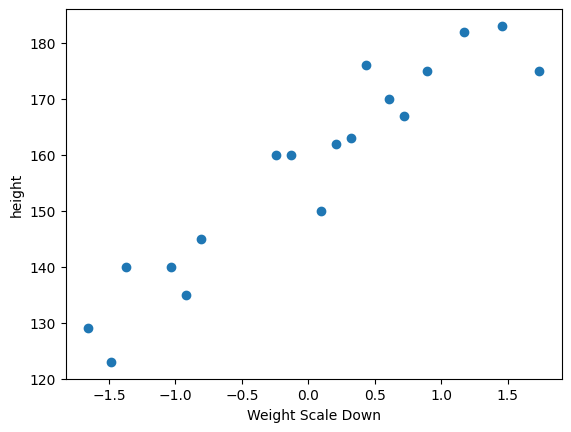

In [20]:
plt.scatter(X_train , y_train)
plt.xlabel("Weight Scale Down")
plt.ylabel("height")

# 6) Model Selection and Training

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
regressor = LinearRegression()

In [23]:
## Training The train Data

regressor.fit(X_train , y_train) # We made a model and best of line is created

# It have one input/independent feature so it must have one intercept and one slope/ coefficient 

LinearRegression()

In [24]:
# This is the intercept of the best fit line
regressor.intercept_   # Q1 ( teta0)

np.float64(157.5)

In [25]:
# This is the coefficient or slope of the best fit line
regressor.coef_   # one cofficient b/c we have one input feature  . it is Q1(teta1)

array([17.03440872])

' My Notes\nregressor  = y \ny = c + mx   ,  here  is c = intercpt_  --> calcualted by regressor\nm = coef_  , already calculated\nso y = intercept_ + coef_ * X_train\n'

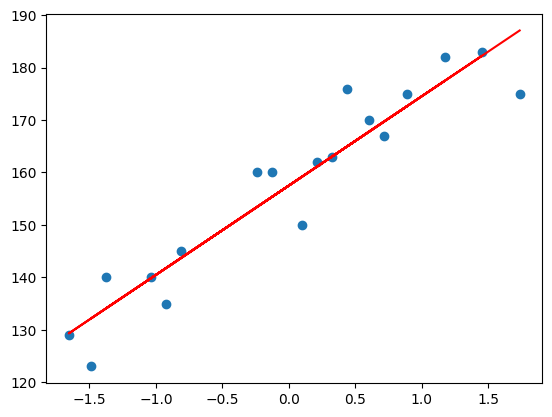

In [26]:
# Let's see the best fit line in the dataset of train for prediction

plt.scatter(X_train , y_train)
# plt.scatter(X_train , regressor.predict(X_train) , c = 'red')

plt.plot(X_train , regressor.predict(X_train) , 'r')   # regressor.Predict(X_train)  = Y Predict  i.e y^

# regressor.predict(X_train) it pridict y^ for X_train data.

""" My Notes
regressor  = y 
y = c + mx   ,  here  is c = intercpt_  --> calcualted by regressor
m = coef_  , already calculated
so y = intercept_ + coef_ * X_train
"""

# Prediction For Test Data

In [27]:
# prediction for test data

y_predicted_test  = regressor.predict(X_test)   # It will find y predicted value for X test dataset

In [28]:
y_predicted_test  # y predicted value for X_test 

array([86.16975108, 86.16975108, 84.37302922, 87.09533506, 85.46195156])

In [29]:
y_test   #  y Actual value  

# ---> There is slighlty difference b/w Y actual and Predicted value  and we ca find as   y_test  - y_predicted_test

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

# Extra My Work
#### We can find the difference b/w the actual and predicted value as
y_test  - y_predicted_test

In [30]:
value_dif = y_test - y_predicted_test
value_dif

15    90.830249
9     83.830249
0     35.626971
8     94.904665
17    73.538048
Name: Height, dtype: float64

#  7) Model Evaluation:

#### -  Assess the performance of the models using metrics like mean squared error (MSE), root mean squared error (RMSE), and R-squared.

# Or

# Performene metrics of Linear Regression
# Or 
# Cost/ Erro Function Calculation
# MSE , MAE , RMSR , MAPE

In [57]:
from sklearn.metrics import mean_squared_error , mean_absolute_error


In [59]:
MSE = mean_squared_error(y_test , y_predicted_test)  # Actula value - predicted value
MSE

np.float64(109.77592599051664)

In [63]:
MAE = mean_absolute_error(y_test , y_predicted_test)
MAE

np.float64(9.822657814519232)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
MAPE = mean_absolute_percentage_error(y_test , y_predicted_test)

In [65]:
RMSE = np.sqrt( MSE)
RMSE

np.float64(10.477400726827081)

# Accuracy of the Model
## R Squared  , and  Adjusted R Squred

In [66]:
from sklearn.metrics import r2_score

# R Squared

In [67]:
score = r2_score( y_test , y_predicted_test)  # accuracy of straight line
score

0.776986986042344

# Adjusted R Squared

In [70]:
1-(1-score)*(len(y_test) -1) / (len(y_test) - X_test.shape[1] - 1)


0.7026493147231252

# Pickling

In [31]:
import pickle

In [33]:
# Serilze the model     # Storing in a file for future use

with open("scaler.pkl" , 'wb') as f:
    pickle.dump(scaler , f)  # write scaler in a file f


with open("Regressor.pkl" , 'wb') as f:
    pickle.dump(regressor , f) # wrie regressor in a file f

In [53]:
# Deserilize the model                # Loading / reading from the file to predict the new values
with open("scaler.pkl", 'rb') as f:
    load_scaler = pickle.load( f)


with open("Regressor.pkl" , 'rb') as f:
    load_model = pickle.load(f)

# Taking input from user

In [46]:
x_new = np.random.randint( 1 , 30 , size= 9)
x_new

array([ 2, 14,  6, 29, 26,  8, 12, 21, 12], dtype=int32)

In [47]:
x_new.shape , x_new.ndim

((9,), 1)

In [49]:
# letes covet it into 2-d array

x_new = np.expand_dims(x_new  , axis= 1)
x_new.ndim

2

# Check the Scaler Model through Pickling

In [50]:
X_new_test = load_scaler.transform(x_new)

C:\Users\Tariq Ullah\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [55]:
X_new_test

array([[-4.08624795],
       [-3.407824  ],
       [-3.86010663],
       [-2.55979406],
       [-2.72940005],
       [-3.74703597],
       [-3.52089466],
       [-3.0120767 ],
       [-3.52089466]])

# Check the Regressor Model

In [54]:
y_new_prd_test = load_model.predict(X_new_test)

In [56]:
y_new_prd_test

array([ 87.89318233,  99.44973315,  91.74536594, 113.89542168,
       111.00628397,  93.67145774,  97.52364135, 106.19105446,
        97.52364135])

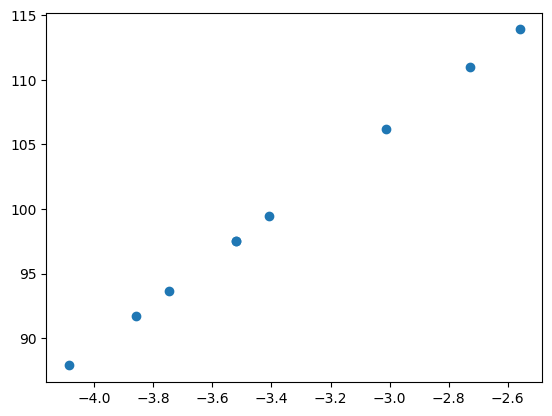

In [57]:
plt.scatter(X_new_test , y_new_prd_test) # Yes there is a linear relationship b/w it

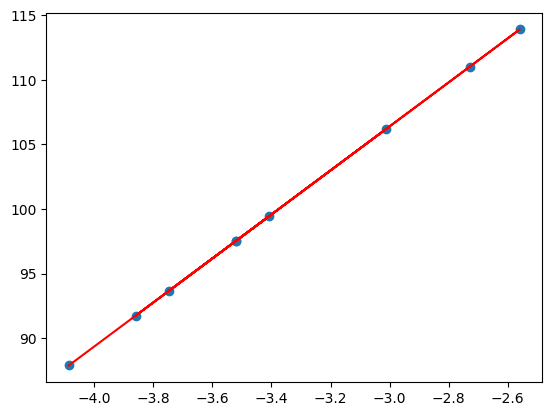

In [59]:
plt.scatter(X_new_test , load_model.predict(X_new_test))

plt.plot(X_new_test , y_new_prd_test , 'r')   # this is my best fit line